## Model comparison plot

Show predictions vs truth for a range of our different models

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

In [2]:
# pnet and logistic regression results from Frank
result_path1 = '../../results/orig_pnet.pkl'
# GNN results from Chris
result_path2 = '../../variance_1.p'

df1 = pd.read_pickle(result_path1)
print(df1.keys())

df2 = pd.read_pickle(result_path2)
print(df2.keys())

dict_keys(['LogisticRegression', 'P-net'])
dict_keys(['GATNet', 'GCNet', 'VGCNet', 'MetaLayer', 'LR'])


In [3]:
# handling df1
auprc = {}

for key in df1.keys():
    df1[key] = df1[key].drop('pred', axis=1)
    df1[key]['mean'] = df1[key]['pred_scores'].mean(axis=1)
    df1[key]['std'] = df1[key]['pred_scores'].std(axis=1)
    tmp = np.zeros((30))
    for i in range(30):
        tmp[i] = average_precision_score(df1[key]['y'].to_numpy(), df1[key].iloc[:, i].to_numpy())
    auprc[key] = (tmp.mean(), tmp.std())

In [4]:
set_index = ['SC_9086',
 'AAPC-STID0000021537-Tumor-SM-3RVW7',
 'TCGA-KK-A7AQ',
 'MO_1118',
 'PROS11496-6115286-SM-6CNPY',
 'TCGA-HC-A6HY',
 'P03-2345',
 'SC_9105',
 'TCGA-V1-A8MM',
 'TCGA-HC-7081',
 'TCGA-HC-8264',
 'TCGA-V1-A8WV',
 'P03-871',
 'TCGA-YL-A8SB',
 'TCGA-HC-8259',
 'MO_1124',
 'TCGA-HC-A6HX',
 'TCGA-KK-A8IJ',
 'TCGA-EJ-5506',
 'TCGA-HC-7230',
 'TCGA-EJ-7218',
 'PROS12319B-SU2C-06115122-SM-4W2NH',
 'TP_2064',
 'TCGA-G9-6498',
 'SC_9059',
 'TP_2077',
 'PM15',
 'MO_1012',
 'PROS11496-6115323-SM-6CNQ8',
 'TCGA-KK-A7B1',
 'TCGA-J9-A52D',
 'TCGA-KK-A7AY',
 'TCGA-2A-A8VV',
 'SC_9158',
 'TCGA-ZG-A9M4',
 'AAPC-IP_LG-069-Tumor-SM-3NC72',
 '01-095N1_LN',
 'TCGA-YL-A8SK',
 'P05-3436',
 'AAPC-STID0000017088-Tumor-SM-2XU1V',
 'TCGA-J4-AATZ',
 'PM158',
 'TCGA-V1-A9OQ',
 'TCGA-CH-5761',
 'TCGA-V1-A8X3',
 'TCGA-J4-A6M7',
 'TCGA-HC-7077',
 'AAPC-STID0000021614-Tumor-SM-2XU1O',
 'AAPC-STID0000021600-Tumor-SM-3RVWL',
 'PR-3036',
 'MO_1020',
 '01-087MM_BONE',
 'PR-04-3222',
 '10362',
 'TCGA-V1-A8ML',
 'SC_9172',
 'TCGA-YL-A8HO',
 'TCGA-KC-A4BO',
 'TCGA-J4-A83I',
 'TCGA-EJ-A8FU',
 'AAPC-STID0000003057-Tumor-SM-2XTZT',
 'MO_1184',
 'PR-09-2517',
 'TCGA-G9-6365',
 'P04-2599',
 'TCGA-SU-A7E7',
 'TP_2001',
 'PROS12319B-SU2C-06115115-SM-4W2NA',
 'TCGA-YL-A9WI',
 'PR-02-169',
 'P06-1125',
 'MO_1473',
 'TCGA-V1-A9O5',
 'TCGA-EJ-A46B',
 'AAPC-STID0000021584-Tumor-SM-2XTZ6',
 '08-093J1_LN',
 'PROS11496-6115319-SM-6CNQ3',
 'PM154',
 'TP_2020',
 'SC_9023',
 'AAPC-STID0000012110-Tumor-SM-2XU1J',
 'AAPC-STID0000021532-Tumor-SM-3RVW5',
 'PROS10448-SUTC.01115092-SM-4JC74',
 'PROS01448-DFCI.10-448.P38-SM-5CQ52',
 'AAPC-STID0000007180-Tumor-SM-2XU14',
 'P05-2212',
 'TCGA-HC-7819',
 'TCGA-J4-A67T',
 'PR-2762',
 'TCGA-QU-A6IO',
 'MO_1013',
 'TCGA-YL-A8HJ',
 'TCGA-HC-8261',
 'AAPC-STID0000021611-Tumor-SM-2XU18',
 'TCGA-G9-7522',
 'TCGA-KK-A8I4',
 'SC_9084',
 'AAPC-STID0000002909-Tumor-SM-2XTZ4',
 'PROS10448-1115156-SM-5EEBN',
 'TCGA-KK-A8IH',
 'SC_9019',
 'PRAD-6115390.0-SM-7LGUC']

In [5]:
# handling df2
tmp = {}
for method in ['GATNet', 'GCNet', 'VGCNet', 'MetaLayer']:
    tmp[method] = pd.DataFrame()
    tmp_auprc = np.zeros((30))
    for i in range(1, 31):
        tmp[method][str(i)] = df2[method][i]['test predictions']
        tmp_auprc[i-1] = df2[method][i]['test aupr']
    tmp[method]['mean'], tmp[method]['std'] = tmp[method].mean(axis=1), tmp[method].std(axis=1)
    auprc[method] = (tmp_auprc.mean(), tmp_auprc.std())
    tmp[method] = tmp[method].set_axis(set_index)

In [6]:
auprc

{'LogisticRegression': (0.8666808171811539, 3.3306690738754696e-16),
 'P-net': (0.8897755822269666, 0.005541171248361973),
 'GATNet': (0.836625315393695, 0.009893771271982436),
 'GCNet': (0.8237937615867655, 0.0150256392074555),
 'VGCNet': (0.7916339560997193, 0.009893782834554481),
 'MetaLayer': (0.8792088333631275, 0.01925360359516127)}

In [7]:
# combine both results
mean_total = pd.concat([tmp[method]['mean'] for method in tmp.keys()] + [df1[method]['mean'] for method in df1.keys()], axis=1)
mean_total = pd.concat([mean_total, df1['P-net']['y']], axis=1)
mean_total.columns = list(tmp.keys()) + list(df1.keys()) + ['Truth']

In [8]:
mean_total

,GATNet,GCNet,VGCNet,MetaLayer,LogisticRegression,P-net,Truth
SC_9086,0.511653,0.336711,1.722230e-01,0.483934,0.653105,0.245952,1
AAPC-STID0000021537-Tumor-SM-3RVW7,0.090235,0.098524,1.381970e-08,0.015086,0.000031,0.001219,0
TCGA-KK-A7AQ,0.540729,0.381987,8.650686e-01,0.558300,0.238596,0.556445,0
MO_1118,0.524199,0.452978,9.358475e-01,0.588002,0.713616,0.801589,1
PROS11496-6115286-SM-6CNPY,0.800862,0.803950,9.964465e-01,0.683035,0.234733,0.197037,1
...,...,...,...,...,...,...,...
AAPC-STID0000002909-Tumor-SM-2XTZ4,0.038452,0.063343,9.394311e-03,0.020005,0.176808,0.072000,0
PROS10448-1115156-SM-5EEBN,0.291946,0.280112,8.214201e-02,0.190444,0.024495,0.213300,1
TCGA-KK-A8IH,0.089387,0.116206,7.362353e-01,0.084166,0.266500,0.353731,0
SC_9019,0.420860,0.380830,2.877370e-01,0.679667,0.475889,0.347071,1


In [9]:
# combine both results
std_total = pd.concat([tmp[method]['std'] for method in tmp.keys()] + [df1[method]['std'] for method in df1.keys()], axis=1)
std_total.columns = list(tmp.keys()) + list(df1.keys())
std_total['Truth'] = 0

In [10]:
std_total

,GATNet,GCNet,VGCNet,MetaLayer,LogisticRegression,P-net,Truth
SC_9086,0.030394,0.039663,9.720989e-02,0.088500,1.891541e-15,0.036478,0
AAPC-STID0000021537-Tumor-SM-3RVW7,0.013542,0.030686,1.176909e-08,0.004663,3.744781e-18,0.000154,0
TCGA-KK-A7AQ,0.028747,0.082795,2.011164e-01,0.079758,1.492888e-14,0.089788,0
MO_1118,0.022152,0.038412,8.350439e-02,0.084465,1.988166e-16,0.026023,0
PROS11496-6115286-SM-6CNPY,0.018272,0.011905,1.930904e-02,0.085393,2.377110e-15,0.030767,0
...,...,...,...,...,...,...,...
AAPC-STID0000002909-Tumor-SM-2XTZ4,0.018205,0.008550,4.886613e-03,0.007289,7.668330e-16,0.006458,0
PROS10448-1115156-SM-5EEBN,0.018475,0.016362,1.618057e-01,0.107194,4.420582e-17,0.044653,0
TCGA-KK-A8IH,0.008070,0.005982,1.399057e-01,0.027869,2.737103e-15,0.030910,0
SC_9019,0.019967,0.014968,1.265914e-01,0.085499,3.308262e-16,0.035578,0


In [11]:
# preparing figure
# printed methods and order
methods = ['Truth', 'P-net', 'MetaLayer', 'GATNet', 'GCNet', 'VGCNet', 'LogisticRegression']

printed_label = []
for method in methods:
    if method == 'Truth':
        printed_label.append("Truth")
    else:
        mean, std = auprc[method]
        printed_label.append(f"{method}\n{mean:.2f}\u00B1{std:.2f}") 
        
mean_output = mean_total[methods]
std_output = std_total[methods]

In [12]:
# order of the test case
def df2np(df, order='p-net'):

    total_np = df.to_numpy().transpose()

#     Order on p-net
    if order == 'p-net':
        total_np = total_np[:,np.argsort(total_np[0,:])]
        total_np = total_np[:,np.argsort(total_np[0,:])]
        total_np[:,:68] = total_np[:, np.argsort(total_np[1,:68])]
        total_np[:,68:] = total_np[:, np.argsort(total_np[1,68:])+68]
#     Order on average of all predictors
    elif order == 'average_all':
        total_np = total_np[:,np.argsort(total_np[0,:])]
        order_tmp = np.mean(total_np[1:], axis=0)
        total_np[:,:68] = total_np[:, np.argsort(order_tmp[:68])]
        total_np[:,68:] = total_np[:, np.argsort(order_tmp[68:])+68]
    
    return total_np

In [13]:
total_mean = df2np(mean_output, order='p-net')
total_std = df2np(std_output, order='p-net')

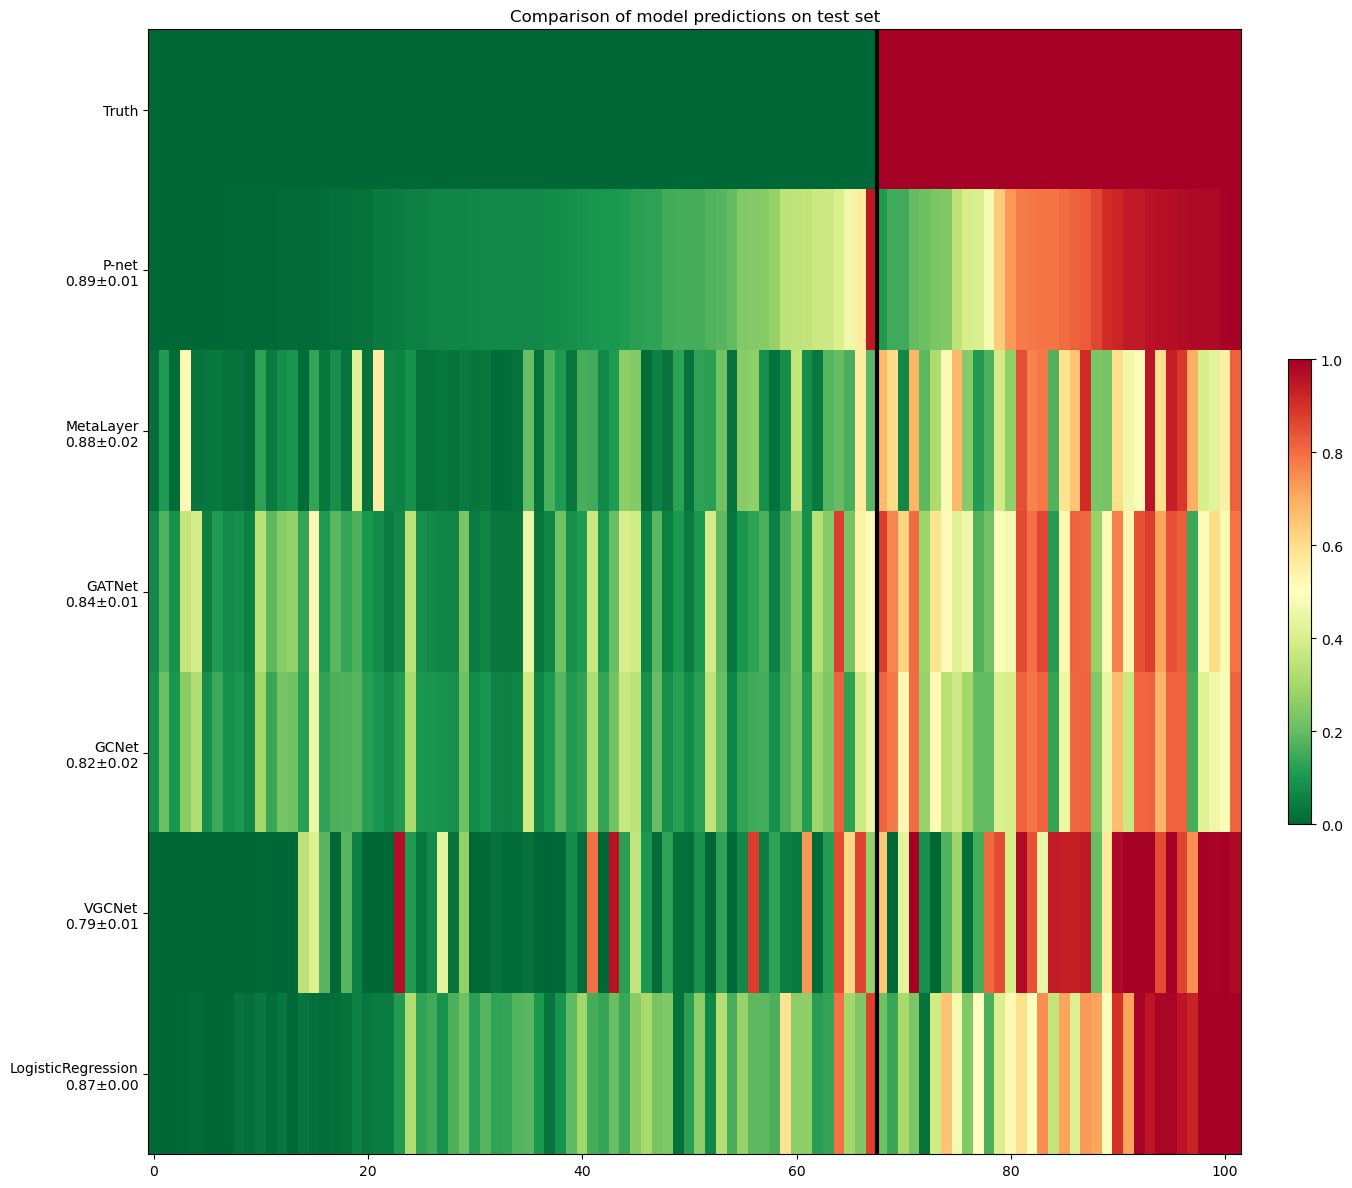

In [14]:
plt.figure(figsize=(15, len(methods)*3))
plt.title("Comparison of model predictions on test set")
plt.imshow(total_mean,aspect=15,interpolation="none",cmap="RdYlGn_r")
plt.axvline(np.argmax(total_mean[0,:][np.argsort(total_mean[0,:])])-0.5,color="black",linewidth=3) ## Solid black line just to differentiate between 0 and 1 test points
plt.colorbar(fraction=0.02, pad=0.04)
plt.yticks(range(len(methods)), printed_label);

### Plot with std
This plot is too messy, only for internal reference.
The redius of the circle represents the standard derivation of 30 predictions. i.e. Larger circle means the predictor has more consistent predictions.

In [15]:
from matplotlib.collections import PatchCollection

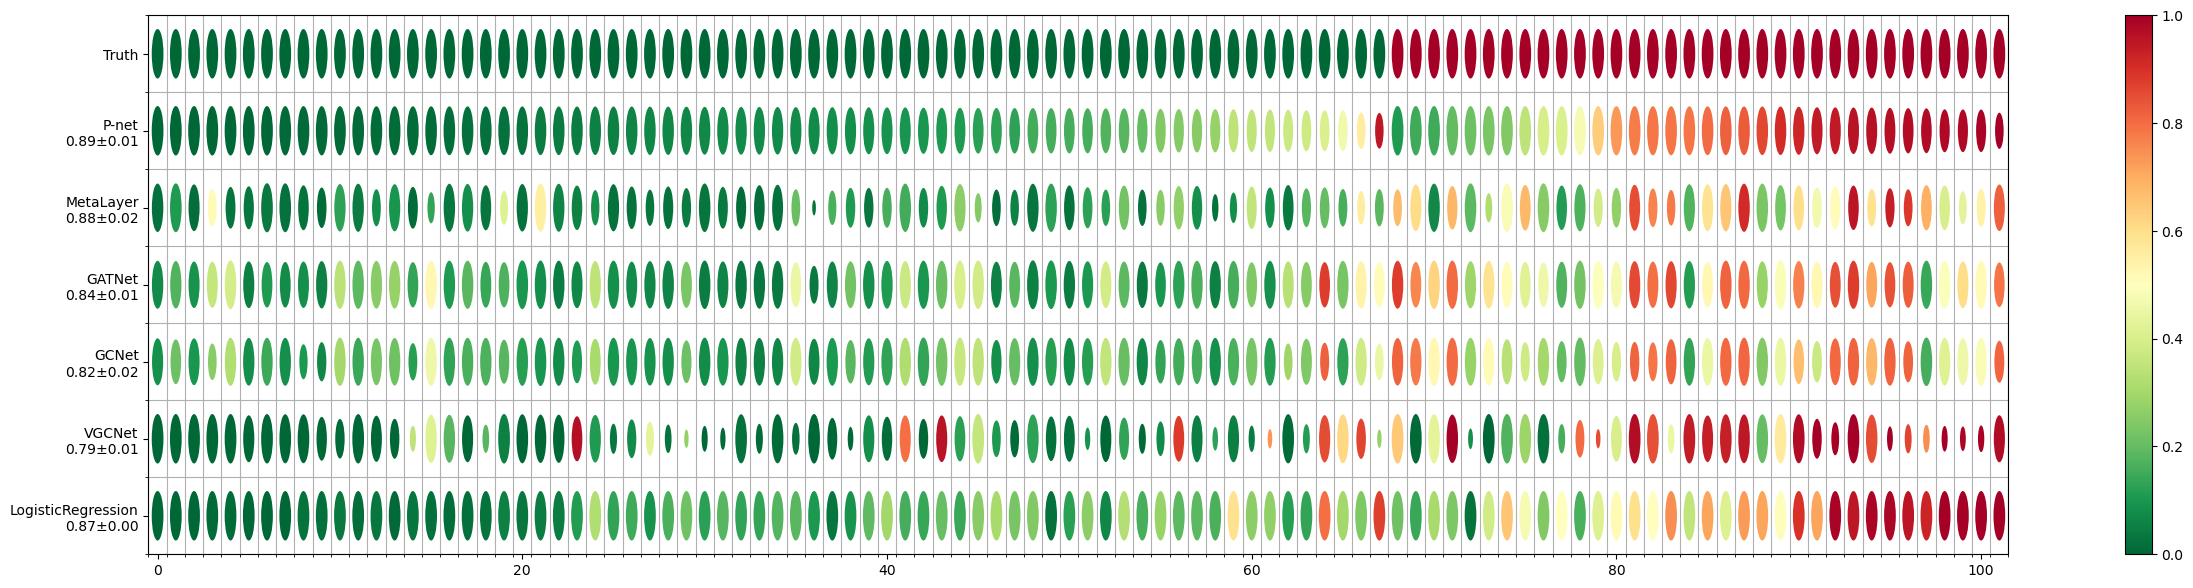

In [16]:
fig, ax = plt.subplots(1,1,figsize=(30,1*len(methods)))
N, M = np.shape(total_std)

circles = []
for i in range(M):
    for j in range(N):
        circles.append(plt.Circle((i,j), radius=np.max(total_std)-total_std[j,i]+0.1))
col = PatchCollection(circles, array=total_mean.transpose().flatten(), cmap="RdYlGn_r")
ax.add_collection(col)

ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_yticks(range(N), printed_label)

ax.grid(which='minor')

fig.colorbar(col)
plt.gca().invert_yaxis()